<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.351184,60.340280,98.973571,71.404774,-154.502513,154.567296,315.584797,-161.017501
1,0.0,1.0,69.521009,50.990382,52.582457,84.656777,-120.961228,146.789396,275.617068,-128.827673
2,0.0,2.0,85.040381,88.739053,32.743096,49.482645,-29.902712,236.102462,278.791808,-42.689346
3,0.0,3.0,73.206799,44.397900,22.811966,46.141370,46.462589,243.020624,199.917692,43.102932
4,0.0,4.0,83.364329,43.958439,32.144011,61.244399,4.450999,235.162177,241.406484,-6.244307
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,41.993575,27.053852,26.496472,21.875636,-51.587402,75.832133,104.273443,-28.441311
59996,999.0,56.0,74.542542,46.177126,62.948188,72.659829,-25.710069,240.617617,266.465110,-25.847494
59997,999.0,57.0,71.943263,45.327984,34.564373,60.388997,32.823119,255.047737,222.782947,32.264790
59998,999.0,58.0,35.926707,86.342231,23.716236,57.819925,-64.549131,149.255967,225.832268,-76.576301


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    68.351184  60.340280  98.973571  71.404774 -154.502513   
      1.0    69.521009  50.990382  52.582457  84.656777 -120.961228   
      2.0    85.040381  88.739053  32.743096  49.482645  -29.902712   
      3.0    73.206799  44.397900  22.811966  46.141370   46.462589   
      4.0    83.364329  43.958439  32.144011  61.244399    4.450999   
...                ...        ...        ...        ...         ...   
999.0 55.0   41.993575  27.053852  26.496472  21.875636  -51.587402   
      56.0   74.542542  46.177126  62.948188  72.659829  -25.710069   
      57.0   71.943263  45.327984  34.564373  60.388997   32.823119   
      58.0   35.926707  86.342231  23.716236  57.819925  -64.549131   
      59.0   57.782814  57.234602  49.776598  82.317544   36.701226   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    154.567296  315.584797 -161.017501  
      1.0    146.789396  275.617068 -128.827673  
      2.0    236.102462  278.791808  -42.689346  
      3.0    243.020624  199.917692   43.102932  
      4.0    235.162177  241.406484   -6.244307  
...                 ...         ...         ...  
999.0 55.0    75.832133  104.273443  -28.441311  
      56.0   240.617617  266.465110  -25.847494  
      57.0   255.047737  222.782947   32.264790  
      58.0   149.255967  225.832268  -76.576301  
      59.0   293.812784  268.598957   25.213828  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    68.351184  60.340280  98.973571  71.404774 -154.502513   
      1.0    69.521009  50.990382  52.582457  84.656777 -120.961228   
      2.0    85.040381  88.739053  32.743096  49.482645  -29.902712   
      3.0    73.206799  44.397900  22.811966  46.141370   46.462589   
      4.0    83.364329  43.958439  32.144011  61.244399    4.450999   
...                ...        ...        ...        ...         ...   
999.0 55.0   41.993575  27.053852  26.496472  21.875636  -51.587402   
      56.0   74.542542  46.177126  62.948188  72.659829  -25.710069   
      57.0   71.943263  45.327984  34.564373  60.388997   32.823119   
      58.0   35.926707  86.342231  23.716236  57.819925  -64.549131   
      59.0   57.782814  57.234602  49.776598  82.317544   36.701226   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    154.567296  315.584797 -161.017501  
      1.0    146.789396  275.617068 -128.827673  
      2.0    236.102462  278.791808  -42.689346  
      3.0    243.020624  199.917692   43.102932  
      4.0    235.162177  241.406484   -6.244307  
...                 ...         ...         ...  
999.0 55.0    75.832133  104.273443  -28.441311  
      56.0   240.617617  266.465110  -25.847494  
      57.0   255.047737  222.782947   32.264790  
      58.0   149.255967  225.832268  -76.576301  
      59.0   293.812784  268.598957   25.213828  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.351184,60.340280,98.973571,71.404774,-154.502513,154.567296,315.584797,-161.017501
1,0.0,1.0,69.521009,50.990382,52.582457,84.656777,-120.961228,146.789396,275.617068,-128.827673
2,0.0,2.0,85.040381,88.739053,32.743096,49.482645,-29.902712,236.102462,278.791808,-42.689346
3,0.0,3.0,73.206799,44.397900,22.811966,46.141370,46.462589,243.020624,199.917692,43.102932
4,0.0,4.0,83.364329,43.958439,32.144011,61.244399,4.450999,235.162177,241.406484,-6.244307
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,41.993575,27.053852,26.496472,21.875636,-51.587402,75.832133,104.273443,-28.441311
59996,999.0,56.0,74.542542,46.177126,62.948188,72.659829,-25.710069,240.617617,266.465110,-25.847494
59997,999.0,57.0,71.943263,45.327984,34.564373,60.388997,32.823119,255.047737,222.782947,32.264790
59998,999.0,58.0,35.926707,86.342231,23.716236,57.819925,-64.549131,149.255967,225.832268,-76.576301


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    68.351184  60.340280  98.973571  71.404774 -154.502513   
      1.0    69.521009  50.990382  52.582457  84.656777 -120.961228   
      2.0    85.040381  88.739053  32.743096  49.482645  -29.902712   
      3.0    73.206799  44.397900  22.811966  46.141370   46.462589   
      4.0    83.364329  43.958439  32.144011  61.244399    4.450999   
...                ...        ...        ...        ...         ...   
999.0 55.0   41.993575  27.053852  26.496472  21.875636  -51.587402   
      56.0   74.542542  46.177126  62.948188  72.659829  -25.710069   
      57.0   71.943263  45.327984  34.564373  60.388997   32.823119   
      58.0   35.926707  86.342231  23.716236  57.819925  -64.549131   
      59.0   57.782814  57.234602  49.776598  82.317544   36.701226   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    154.567296  315.584797 -161.017501  
      1.0    146.789396  275.617068 -128.827673  
      2.0    236.102462  278.791808  -42.689346  
      3.0    243.020624  199.917692   43.102932  
      4.0    235.162177  241.406484   -6.244307  
...                 ...         ...         ...  
999.0 55.0    75.832133  104.273443  -28.441311  
      56.0   240.617617  266.465110  -25.847494  
      57.0   255.047737  222.782947   32.264790  
      58.0   149.255967  225.832268  -76.576301  
      59.0   293.812784  268.598957   25.213828  

[60000 rows x 8 columns]

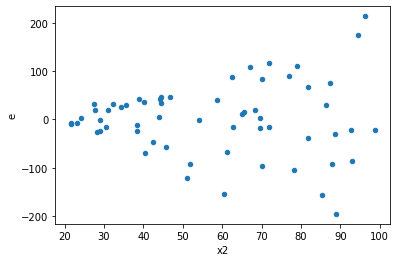

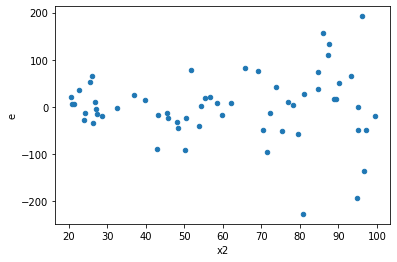

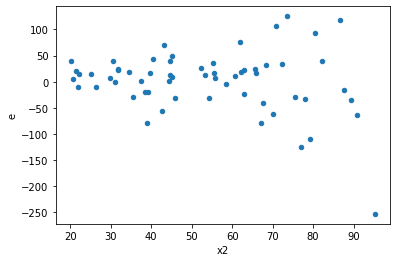

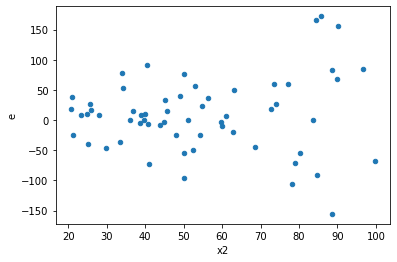

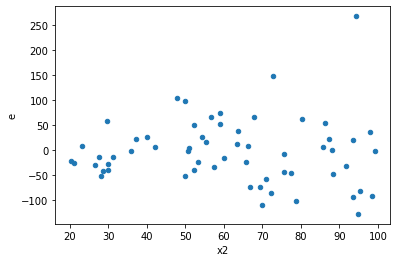

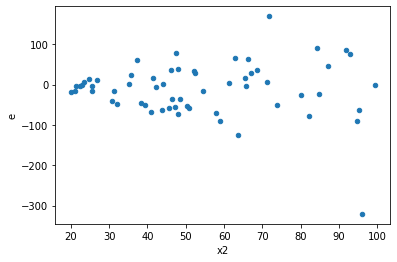

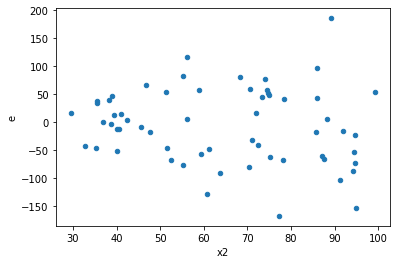

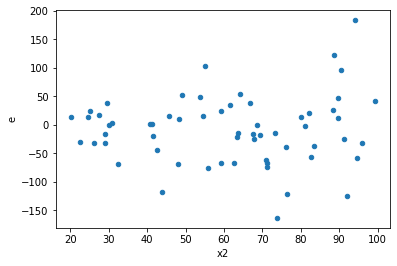

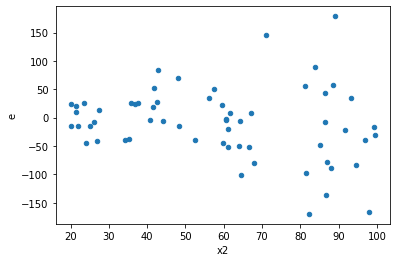

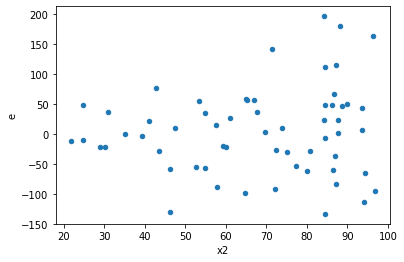

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,29.0,23.0,83982.17352774086,207819.3942913915,2895.9370181979607,9035.625838756152,3.120104402124982,0.0066697158702042625,0.9966651420648979,0.0033348579351021312,Reject001=0 : Heteroscedasticity
1.0,27.0,25.0,115598.99926045527,138095.0299969978,4281.444417053899,5523.801199879912,1.290172348817012,0.5248388644325845,0.7375805677837077,0.26241943221629227,Reject001=1 : Homoscedasticity
2.0,29.0,23.0,88835.51115453753,85125.58969108191,3063.293488087501,3701.112595264431,1.208213515831008,0.6476221662016024,0.6761889168991988,0.3238110831008012,Reject001=1 : Homoscedasticity
4.0,32.0,20.0,74520.41453844466,164119.37464628177,2328.7629543263956,8205.968732314088,3.523745822677645,0.004426749359393911,0.997786625320303,0.0022133746796969556,Reject001=0 : Heteroscedasticity
5.0,29.0,23.0,104486.5904830166,111489.92435270434,3602.9858787247103,4847.388015334972,1.3453807976207561,0.46947940947544287,0.7652602952622786,0.23473970473772143,Reject001=1 : Homoscedasticity
6.0,28.0,24.0,61385.378094107306,148032.6035691367,2192.334931932404,6168.0251487140295,2.8134501981762923,0.012116791268776073,0.993941604365612,0.006058395634388036,Reject001=1 : Homoscedasticity
7.0,32.0,20.0,79630.81809128732,64315.75630844429,2488.463065352729,3215.7878154222144,1.2922787001326823,0.5540179810932129,0.7229910094533936,0.27700899054660644,Reject001=1 : Homoscedasticity
9.0,17.0,35.0,61927.53686098964,218159.8034403721,3642.796285940567,6233.1372411534885,1.7110858669781743,0.17593622562770306,0.9120318871861485,0.08796811281385153,Reject001=1 : Homoscedasticity
14.0,32.0,20.0,101719.51083976,67881.02831356335,3178.7347137425,3394.0514156781674,1.0677366063310654,0.8970463786639131,0.5514768106680434,0.44852318933195656,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,29.0,23.0,83982.17352774086,207819.3942913915,2895.9370181979607,9035.625838756152,3.120104402124982,0.0066697158702042625,Reject001=0 : Heteroscedasticity
1.0,27.0,25.0,115598.99926045527,138095.0299969978,4281.444417053899,5523.801199879912,1.290172348817012,0.5248388644325845,Reject001=1 : Homoscedasticity
2.0,29.0,23.0,88835.51115453753,85125.58969108191,3063.293488087501,3701.112595264431,1.208213515831008,0.6476221662016024,Reject001=1 : Homoscedasticity
3.0,19.0,33.0,130392.712634765,77198.78768137036,6862.774349198158,2339.3572024657688,0.34087631086677034,0.015786901338771687,Reject001=1 : Homoscedasticity
4.0,32.0,20.0,74520.41453844466,164119.37464628177,2328.7629543263956,8205.968732314088,3.523745822677645,0.004426749359393911,Reject001=0 : Heteroscedasticity
5.0,29.0,23.0,104486.5904830166,111489.92435270434,3602.9858787247103,4847.388015334972,1.3453807976207561,0.46947940947544287,Reject001=1 : Homoscedasticity
6.0,28.0,24.0,61385.378094107306,148032.6035691367,2192.334931932404,6168.0251487140295,2.8134501981762923,0.012116791268776073,Reject001=1 : Homoscedasticity
7.0,32.0,20.0,79630.81809128732,64315.75630844429,2488.463065352729,3215.7878154222144,1.2922787001326823,0.5540179810932129,Reject001=1 : Homoscedasticity
8.0,23.0,29.0,136021.50134865695,59109.55390990891,5913.978319506824,2038.2604796520313,0.34465132767378914,0.010799737426014627,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      802
Reject001=0 : Heteroscedasticity    198
Name: Result_test, dtype: int64